# Part 1: Data Preperation and Exploration

In [1]:
# import packages and libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from scipy.stats import shapiro
%matplotlib inline

In [2]:
# Read file
df = pd.read_csv("mlq2.csv")

# About the Data

This data comes from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+). This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition.

### Notes:
<ul> 
    <li> This data is created via survery. However the data was imbalanced and records were synthasized using WEKA to simulate additional responses.
    <li> The synthasized data fits the distribution of the data but generates floats (ratio data) where ordinal and integer data were the original values in the survey.
    <li> The target variable is comprised of the variables height and weight. Height and weight are used to classisfy a persons BMI. The BMI measure was then used to classify each observation. 
</ul>

### Features & Descriptions

<table>
    <thead>
        <tr><th>Category</th><th>Feature Name</th><th>Description</th><th>Variable Type</th></tr>
    </thead>
    <tbody>
        <tr><td>Target Variable</td><td>NObesity</td><td>Based on BMI</td><td>Categorical</td></tr>
        <tr><td>Eating Habits</td><td>FAVC</td><td>Frequent consumption of high caloric food</td><td>Categorical</td></tr>
        <tr><td>Eating Habits</td><td>FCVC</td><td>Frequency of consumption of vegetables</td><td>Ordinal</td></tr>
        <tr><td>Eating Habits</td><td>NCP</td><td>Number of main meals</td><td>Ordinal</td></tr>
        <tr><td>Eating Habits</td><td>CAEC</td><td>Consumption of food between meals</td><td>Ordinal</td></tr>
        <tr><td>Eating Habits</td><td>CH20</td><td>Consumption of water daily</td><td>Ordinal</td></tr>
        <tr><td>Eating Habits</td><td>CALC</td><td>Consumption of alcohol</td><td>Ordinal</td></tr>
        <tr><td>Physical Conditioning</td><td>SCC</td><td>Calories consumption monitoring</td><td>Categorical</td></tr>
        <tr><td>Physical Conditioning</td><td>FAF</td><td>Pysical activity frequency</td><td>Ordinal</td></tr>
        <tr><td>Physical Conditioning</td><td>TUE</td><td>Time using technology devices</td><td>Ordinal</td></tr>
        <tr><td>Physical Conditioning</td><td>MTRANS</td><td>Transportation used</td><td>Categorical</td></tr>
        <tr><td>Physical Conditioning</td><td>SMOKE</td><td>Smokes Yes or No</td><td>Categorical</td></tr>
        <tr><td>Responder Charateristics</td><td>Family History with Overweight</td><td>Yes or No</td><td>Categorical</td></tr>
        <tr><td>Responder Charateristics</td><td>Gender</td><td>Gender is Male or Female</td><td>Categorical</td></tr>
        <tr><td>Responder Charateristics</td><td>Age</td><td>Age in years</td><td>Integer</td></tr>
        <tr><td>Responder Charateristics</td><td>Height</td><td>Height in meters</td><td>Float</td></tr>
        <tr><td>Responder Charateristics</td><td>Weight</td><td>Weight in kilograms</td><td>Float</td></tr>        
     </tbody>
</table>



# Exploring the Data & Clean Up

- The data contains 2111 records with 17 columns
- The data loads as text and float objects for most of the objects. However we know that some are float, categorical and ordinal
- All of the records are unique and contain no null values
- Height and Weight are included however they have a direct correlation to each other and our target variable
- The survey data is distinguishable from the synthazied data based on floats used for ordinal variables


In [3]:
# Top 5 rows show survey data
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# Bottom 5 rows show synthetic data
df.tail(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
# Additional rows showing synthetic data
df.iloc[[501,518,516]]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
501,Female,21.853826,1.755643,137.796884,yes,yes,3.000000,3.00000,Sometimes,no,2.184707,no,1.978631,0.838957,Sometimes,Public_Transportation,Obesity_Type_III
518,Female,23.501249,1.600000,45.000000,no,no,2.591439,3.00000,Frequently,no,2.074048,no,1.679935,0.000000,no,Public_Transportation,Insufficient_Weight
516,Female,21.491055,1.586952,43.087508,no,no,2.008760,1.73762,Frequently,no,1.792022,no,0.119643,0.000000,no,Public_Transportation,Insufficient_Weight


#### Data Prep / Clean Up

- Drop Height and Weight columns as they are used in the BMI calculation for our target variable
- Convert categorical variables to category instead of object/text
- Convert synthetic floats & floats to whole integers to better reprsent the ordinal data from orignal survey data

In [6]:
# Height and weight are highly correlated and they directly correlate to the BMI calc used for the target
# Remove Height and Weight
df = df.drop(columns=['Height', 'Weight'])
print(df.shape)

(2111, 15)


In [7]:
# no nulls 
df[df.isnull().any(axis=1)]

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [8]:
# Convert object/text variables to category variables
columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]

for col in columns:
    df[col] = df[col].astype('category')

In [9]:
# function to interigate data after conversion
# provides min, max, unique counts
def variable_counts(columns, stage):

    if stage == 'pre':
        print("Pre Conversion to Integer")
    else:
        print("Post Conversion to Integer")

    for col in columns:    
        print("Variable:", col, "| Count Unique:",df[col].nunique(),"| Min: ", df[col].min(), "| Max: ",df[col].max())

In [10]:
# Convert float variables to integer to the nearest inter
columns = ["FCVC", "NCP", "CH2O", "TUE", "FAF"]

# pre conversion countss
variable_counts(columns, 'pre')

# convert to int / nearest int value
for col in columns:
    #round to nearest whole number
    df[col] = round(df[col]).astype('int')  
    
# post conversion counts
print("")
variable_counts(columns, 'post')

Pre Conversion to Integer
Variable: FCVC | Count Unique: 810 | Min:  1.0 | Max:  3.0
Variable: NCP | Count Unique: 635 | Min:  1.0 | Max:  4.0
Variable: CH2O | Count Unique: 1268 | Min:  1.0 | Max:  3.0
Variable: TUE | Count Unique: 1129 | Min:  0.0 | Max:  2.0
Variable: FAF | Count Unique: 1190 | Min:  0.0 | Max:  3.0

Post Conversion to Integer
Variable: FCVC | Count Unique: 3 | Min:  1 | Max:  3
Variable: NCP | Count Unique: 4 | Min:  1 | Max:  4
Variable: CH2O | Count Unique: 3 | Min:  1 | Max:  3
Variable: TUE | Count Unique: 3 | Min:  0 | Max:  2
Variable: FAF | Count Unique: 4 | Min:  0 | Max:  3


In [11]:
# confirm types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          2111 non-null   category
 1   Age                             2111 non-null   float64 
 2   family_history_with_overweight  2111 non-null   category
 3   FAVC                            2111 non-null   category
 4   FCVC                            2111 non-null   int32   
 5   NCP                             2111 non-null   int32   
 6   CAEC                            2111 non-null   category
 7   SMOKE                           2111 non-null   category
 8   CH2O                            2111 non-null   int32   
 9   SCC                             2111 non-null   category
 10  FAF                             2111 non-null   int32   
 11  TUE                             2111 non-null   int32   
 12  CALC                

In [12]:
# review non synthetic are still the same
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


## Data Intuition & Further Exploration

##### Categorical Variables
- The categorical variables are not gaussian
- Most of the categorical variables are bernoulli in nature
- The target variables based on synthetic process are fairly balanced

##### Ordinal Variables                                        
- Will be treated as nominal         
- Non are Gaussian distributed

##### Ratio Variable
- Age is the only ratio varible
- Is not Gaussian

##### Predictor Coorelations 
- The predictor variables not highly correlated
- Height and Weight have been removed for their correlation to each other and the target

##### Target Variable
- Is categorical with > 2 classes
- Is faily balanced in its distribution of weights

ValueError: could not convert string to float: 'Female'

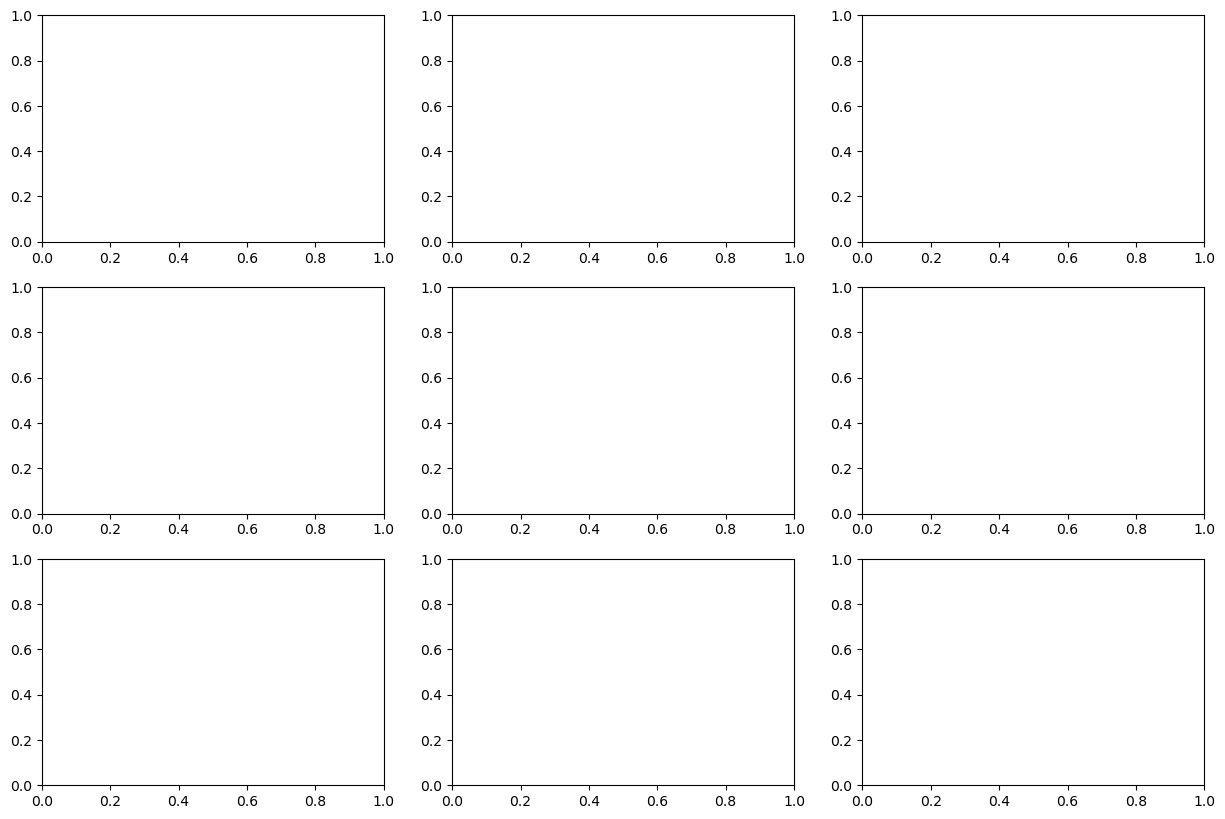

In [13]:
# columns of interest
columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
           'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for col, subplot in zip(columns, ax.flatten()):
    sns.countplot(df[col], ax=subplot)
    
    if col=="MTRANS":
        sns.countplot(df[col],ax=subplot)
        subplot.set_xticklabels(rotation=45, horizontalalignment='right', labels=df.MTRANS)        
        subplot.yaxis.label.set_text("Number of Records")
    elif col=="NObeyesdad":
        sns.countplot(df[col],ax=subplot)
        subplot.set_xticklabels(rotation=45, horizontalalignment='right', labels=df.NObeyesdad)  
        subplot.yaxis.label.set_text("Number of Records")
    else:
        sns.countplot(df[col],ax=subplot)  
        subplot.yaxis.label.set_text("Number of Records")
        
# show figure & plots
fig.suptitle("Categorigal Variables", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.0, h_pad=1)
plt.show()

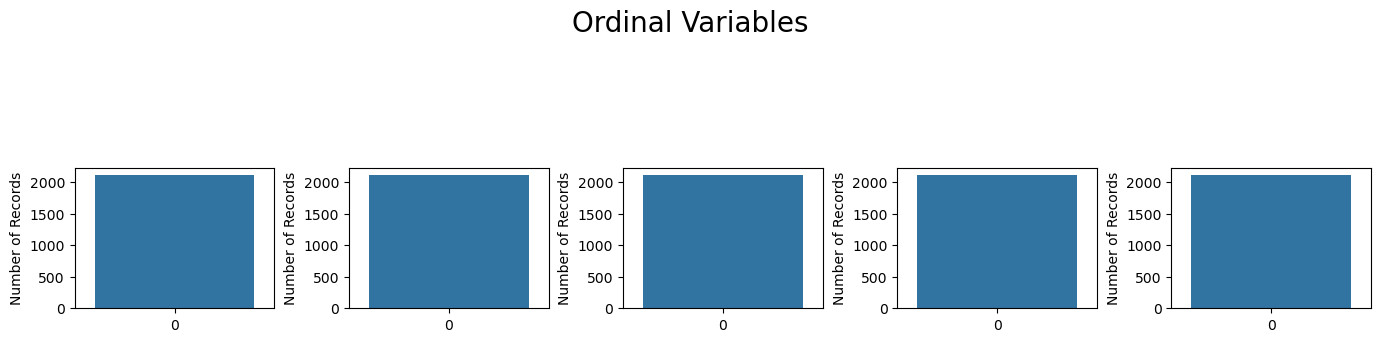

In [16]:
# columns of interest
columns = ["FCVC", "NCP", "CH2O", "FAF", "TUE"]

fig, ax = plt.subplots(1, 5, figsize=(15, 4))
for col, subplot in zip(columns, ax.flatten()):
    sns.countplot(df[col], ax=subplot)
    subplot.yaxis.label.set_text("Number of Records")

# show figure & plots
fig.suptitle("Ordinal Variables", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.7, h_pad=0.5)
plt.show()

C:\Users\tusha\AppData\Local\Temp\ipykernel_7380\2246645352.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"], kde=True)


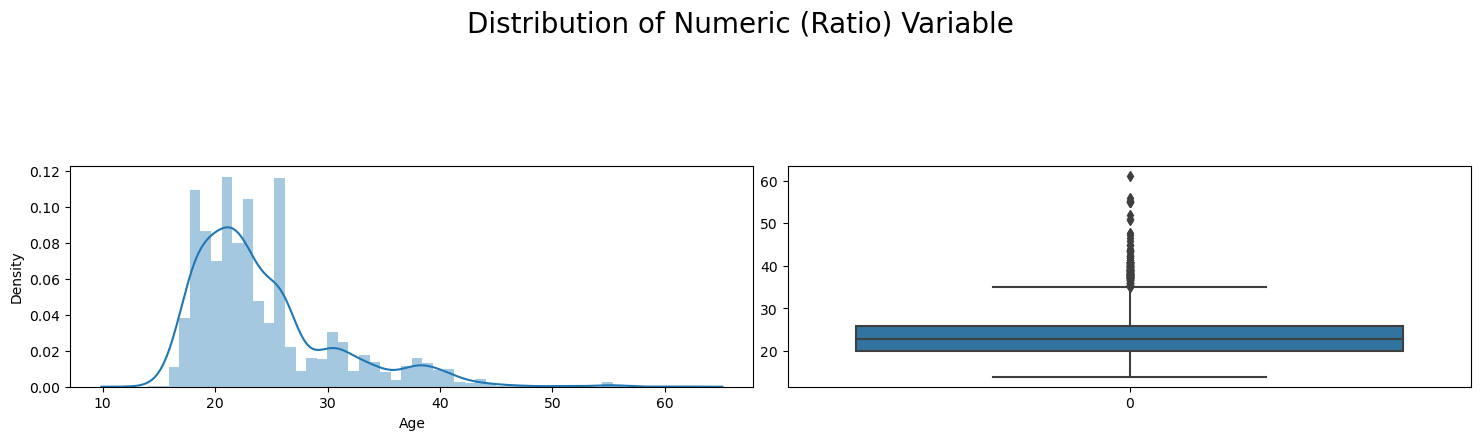

In [17]:
# ratio variable distribution 

fig = plt.figure(figsize = (16,5))

#distplot
ax1 = fig.add_subplot(121)
sns.distplot(df["Age"], kde=True)

#boxplot
ax1 = ax1 = fig.add_subplot(122)
sns.boxplot(df.Age)

# show figure & plots
fig.suptitle("Distribution of Numeric (Ratio) Variable", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.5, h_pad=.1)
plt.show()

C:\Users\tusha\AppData\Local\Temp\ipykernel_7380\2028145602.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(df.corr())
C:\Users\tusha\AppData\Local\Temp\ipykernel_7380\2028145602.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),
C:\Users\tusha\AppData\Local\Temp\ipykernel_7380\2028145602.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(rotation=45, horizontalalignment='right', labels=df.NObeyesdad)


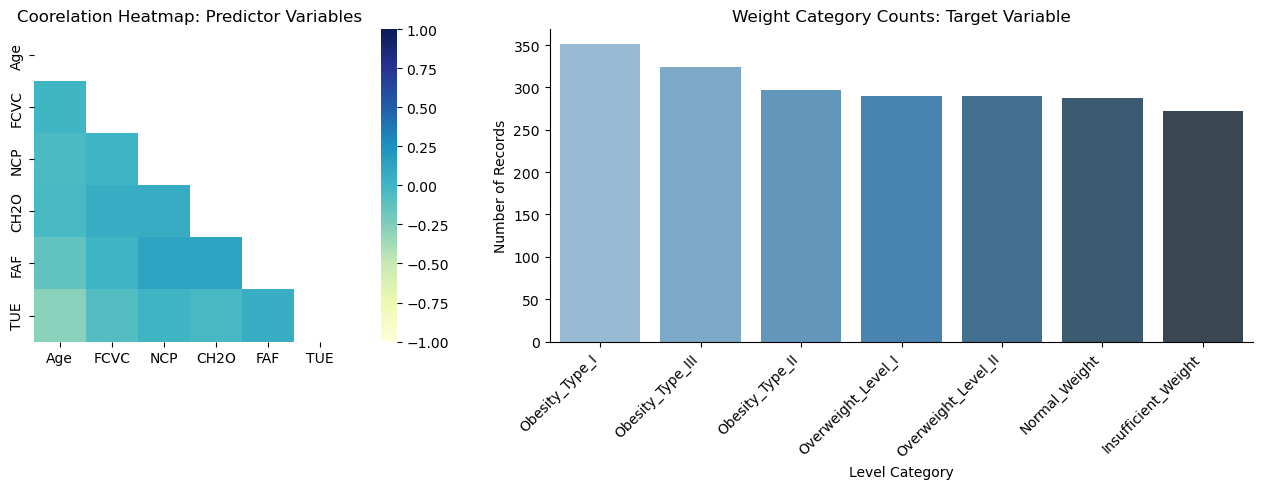

In [18]:
# create figure
fig = plt.figure(figsize=(15, 5))

# add subplot for one row 2 graphs first postion
ax1 = fig.add_subplot(121)

# correlation data matrix
matrix = np.triu(df.corr())

# set title 
ax1.title.set_text("Coorelation Heatmap: Predictor Variables")

#define plot
sns.heatmap(df.corr(), 
                 mask=matrix,
                 annot = False,                 
                 fmt='.1g', 
                 cmap="YlGnBu", 
                 vmin=-1, vmax=1, center= 0,                 
                 square="True",
                 ax=ax1)

# add second subplot
ax2 = fig.add_subplot(122)

# rotate axis label
ax2.set_xticklabels(rotation=45, horizontalalignment='right', labels=df.NObeyesdad)

# Set title text
ax2.title.set_text("Weight Category Counts: Target Variable")

# define second plot
sns.countplot(x="NObeyesdad",                  
                 palette="Blues_d", 
                 order=df.NObeyesdad.value_counts().index,
                 ax = ax2,
                 data=df)

# labels for x and y
ax2.xaxis.label.set_text("Level Category")
ax2.yaxis.label.set_text("Number of Records")

# turn off top and right frame lines
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# show figure & plots
plt.tight_layout()
plt.show()

In [20]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

#print highly correlated variables
print("Number of variables with > 0.95 correlation: ", len(to_drop))

Number of variables with > 0.95 correlation:  0


C:\Users\tusha\AppData\Local\Temp\ipykernel_7380\1394047807.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()
C:\Users\tusha\AppData\Local\Temp\ipykernel_7380\1394047807.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


# Data Intuition & Model Considerations

##### Data Intuion
- Models for this data need to cater to > 2 two classes
- Data is limited so model will need to perform well with limited amount of data
- Model will need to handle dummy variables well and not be dependent on ratio data
- The ordinal variables may or may not be helful to the model
- The data is not Gaussian so the model needs to be non-parametic or at least not strictly parametic 
- The data is pretty wide but not very deep, so reducing the factors may be necessary

##### Potential Models
- Decision Trees 
- Random Forest 
- Search Vector Machines (SVM)

##### Experiments 
Models that may be used to evaluate data assumptions and model performance:
- Is the data too limited for a Nerual Network? 
- Does Logistic Regression perform well if target variable reduced to 2 classes?
- Do the other models perform better if target variable is reduced to 2 classes?

# Part 2: Machine Learning

The target variable is NObesity. The attempt is is apply ML to find the best model for predicting NObesity. 
NObesity is a categorical variable that is a measure of a person weight ranging from under weight to very obese (Overweight Level II). 

# Data prep for ML models: General 
- Some models may require additional treatment 
- These steps will prep the data for the most viable models: Decision Trees, Random Forest, SVM, Nerual Network
- Some models may benifit from scaling so this will be evaluated as well

#### Data Treatment
- Copy cleaned data to new dataframe
- Create dummy variables out of categorical variables
- Split the data into 70/30 train & test datasets     

In [22]:
df_prep = df.copy()

In [23]:
# create dummy variables
df_prep = pd.get_dummies(df_prep,columns=["Gender","family_history_with_overweight",
                                          "FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"])
df_prep.head()

,Age,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,Gender_Male,family_history_with_overweight_no,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,2,3,2,0,1,Normal_Weight,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,21.0,3,3,3,3,0,Normal_Weight,1,0,0,...,1,0,0,1,0,0,0,0,1,0
2,23.0,2,3,2,2,1,Normal_Weight,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,27.0,3,3,2,2,0,Overweight_Level_I,0,1,1,...,0,0,1,0,0,0,0,0,0,1
4,22.0,2,1,2,0,0,Overweight_Level_II,0,1,1,...,0,0,0,1,0,0,0,0,1,0


In [24]:
# split dataset in features and target variable

# Features
X = df_prep.drop(columns=["NObeyesdad"])

# Target variable
y = df_prep['NObeyesdad'] 

In [25]:
# import sklearn packages for data treatments
from sklearn.model_selection import train_test_split # Import train_test_split function

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Machine Learning Models

For this exercise we will take a look at 
- Decision Trees
- Random Forest
- Support Vector Machines (SVM)
- K Nearest Neighbors 

Cursory Look at the model results suggest that Random Forest will be our best initial model with an accuracy of 79%. However, many of the other models performance is not too far off. 

The other interesting result is that all of the models classify Obesity_Type_III amazingly well with >= 98% accuracy across all models. 

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler # Import for standard scaling of the data
from sklearn.preprocessing import MinMaxScaler # Import for standard scaling of the data

# standard scale data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# tested MinMaxScaler as KNN historically does better with MinMax
mm = MinMaxScaler()
X_train_mm_scaled = ss.fit_transform(X_train)
X_test_mm_scaled = ss.transform(X_test)

# program to run multilple models though sklearn 
# Default settings output accuracy and classification report
# compares accuracy for scaled and unscaled data
def run_models(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):
    
    models = [          
          ('Random Forest', RandomForestClassifier(random_state=2020)),
          ('Decision Tree', DecisionTreeClassifier()),                                                 
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC())
        ]  
    
    for name, model in models:        
        # unscaled data
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        # scaled data
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)
        
        # mm scaled data
        clf_mm_scaled = model.fit(X_train_mm_scaled, y_train)
        y_pred_mm_scaled = clf_scaled.predict(X_test_mm_scaled)
        
        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled),5)
        
        # output
        print(name + ':')        
        print("---------------------------------------------------------------")      
        print("Accuracy:", accuracy)
        print("Accuracy w/Scaled Data (ss):", scaled_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_mm_accuracy)
        if (accuracy > scaled_accuracy) and (accuracy > scaled_mm_accuracy):
            print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))      
            print("                            -----------------------------------               \n")      
        elif (scaled_accuracy > scaled_mm_accuracy):
            print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred_scaled))      
            print("                            -----------------------------------               \n")     
        else:            
            print("\nClassification Report (mm):\n", metrics.classification_report(y_test, y_pred_mm_scaled))      
            print("                            -----------------------------------               \n")      

In [27]:
#run Decision Trees, Random Forest, KNN and SVM
run_models(X_train, y_train, X_test, y_test)

Random Forest:
---------------------------------------------------------------
Accuracy: 0.82177
Accuracy w/Scaled Data (ss): 0.82177
Accuracy w/Scaled Data (mm): 0.82177

Classification Report (mm):
                      precision    recall  f1-score   support

Insufficient_Weight       0.85      0.87      0.86        92
      Normal_Weight       0.60      0.69      0.64        77
     Obesity_Type_I       0.85      0.80      0.82       114
    Obesity_Type_II       0.90      0.94      0.92        85
   Obesity_Type_III       0.99      0.99      0.99        92
 Overweight_Level_I       0.79      0.71      0.75        89
Overweight_Level_II       0.76      0.74      0.75        85

           accuracy                           0.82       634
          macro avg       0.82      0.82      0.82       634
       weighted avg       0.83      0.82      0.82       634

                            -----------------------------------               

Decision Tree:
------------------------------

# Hyperparameter Tuning

Searching for better performance out of the models with Gridsearch

In [28]:
from sklearn.model_selection import GridSearchCV

#model name, classifier, parameters
# function used to process models and parameters through gridsearch
def hyper_tune(name, clf, parameters, target_names=None): 
    
    target_names = target_names
    clf = clf
    search = GridSearchCV(clf, parameters,verbose=True, n_jobs=15, cv=5)
    search.fit(X_train_scaled,y_train)
    y_pred_scaled = search.predict(X_test_scaled)
    print ("Accuracy Score = %3.2f" %(search.score(X_test_scaled,y_test)))
    print (search.best_params_)
    print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred_scaled, target_names=target_names))
    

In [29]:
#the KNN model performs better on the unscaled data this function
# function for unscaled data
#model name, classifier, parameters
# function used to process models and parameters through gridsearch
def hyper_tune2(name, clf, parameters, target_names=None): 
    
    target_names = target_names
    clf = clf
    search = GridSearchCV(clf, parameters,verbose=True, n_jobs=15, cv=5)
    search.fit(X_train,y_train)
    y_pred = search.predict(X_test)
    print ("Accuracy Score = %3.2f" %(search.score(X_test,y_test)))
    print (search.best_params_)
    print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred, target_names=target_names))

## KNN

In [30]:
# Number of neighbors
n_neighbors = [int(x) for x in range(4, 15)]
# weights
weights = ['uniform','distance']
# distance metric
metric = ['euclidean', 'manhattan', 'chebyshev']
# computation algorithm
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
# power paramter
p=[1,2]

parameters = { 'n_neighbors': n_neighbors,
              'weights':weights,
              'metric':metric,
              'p':p,
              'algorithm': algorithm              
               }

hyper_tune2('KNN', KNeighborsClassifier(), parameters)

Fitting 5 folds for each of 528 candidates, totalling 2640 fits
Accuracy Score = 0.81
{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.83      0.84      0.83        92
      Normal_Weight       0.78      0.51      0.61        77
     Obesity_Type_I       0.83      0.83      0.83       114
    Obesity_Type_II       0.85      0.94      0.89        85
   Obesity_Type_III       0.91      1.00      0.95        92
 Overweight_Level_I       0.77      0.78      0.77        89
Overweight_Level_II       0.70      0.75      0.73        85

           accuracy                           0.81       634
          macro avg       0.81      0.81      0.80       634
       weighted avg       0.81      0.81      0.81       634



## Random Forest

In [27]:
# Number of trees in random forest
n_estimators = [int(x) for x in range(10, 200,10)]
# Criterion
criterion = ['gini','entropy']
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in range(10, 100, 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in range(2, 5)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in range(2, 5)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# random state
random_state = [1010]

parameters = { 'criterion':criterion,
               'n_estimators': n_estimators,
              'max_depth':max_depth,
              #'random_state': random_state,
              #'max_features':max_features,
              #'min_samples_split':min_samples_split             
               }


hyper_tune('Random Forest',
           RandomForestClassifier(), parameters)

Fitting 5 folds for each of 380 candidates, totalling 1900 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    1.1s
[Parallel(n_jobs=15)]: Done 200 tasks      | elapsed:   24.4s
[Parallel(n_jobs=15)]: Done 450 tasks      | elapsed:   57.6s
[Parallel(n_jobs=15)]: Done 800 tasks      | elapsed:  1.7min
[Parallel(n_jobs=15)]: Done 1250 tasks      | elapsed:  2.8min
[Parallel(n_jobs=15)]: Done 1800 tasks      | elapsed:  4.2min
[Parallel(n_jobs=15)]: Done 1900 out of 1900 | elapsed:  4.4min finished


Accuracy Score = 0.81
{'criterion': 'entropy', 'max_depth': 70, 'n_estimators': 80}

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.82      0.85      0.83        92
      Normal_Weight       0.56      0.64      0.60        77
     Obesity_Type_I       0.86      0.76      0.81       114
    Obesity_Type_II       0.92      0.93      0.92        85
   Obesity_Type_III       0.99      0.99      0.99        92
 Overweight_Level_I       0.75      0.72      0.74        89
Overweight_Level_II       0.72      0.74      0.73        85

           accuracy                           0.81       634
          macro avg       0.80      0.80      0.80       634
       weighted avg       0.81      0.81      0.81       634



# Feature Importance w/ Random Forest

In [28]:
# Create Decision Tree classifer object with optimized parameters
clf = RandomForestClassifier(criterion='entropy',
               n_estimators=52,
              max_depth = 51,              
              max_features='auto',
              min_samples_split=2,
              random_state=1010)

# Train Decision Tree Classifer
clf = clf.fit(X_train_scaled,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_scaled)


In [29]:
print(X.columns)

Index(['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender_Female',
       'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking'],
      dtype='object')


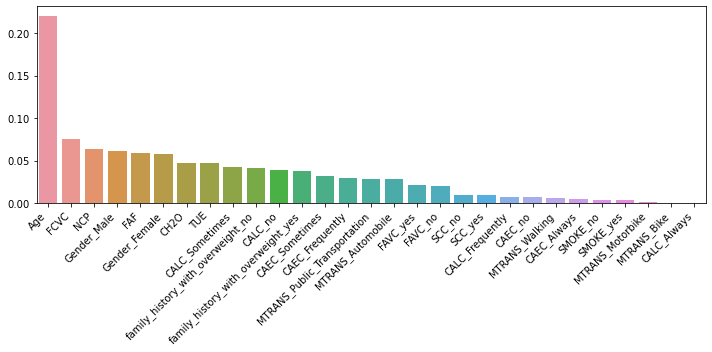


Top 10 Features:
Variable: Age                  Importance: 0.22
Variable: FCVC                 Importance: 0.07
Variable: NCP                  Importance: 0.06
Variable: FAF                  Importance: 0.06
Variable: Gender_Female        Importance: 0.06
Variable: Gender_Male          Importance: 0.06
Variable: CH2O                 Importance: 0.05
Variable: TUE                  Importance: 0.05
Variable: family_history_with_overweight_no Importance: 0.04
Variable: family_history_with_overweight_yes Importance: 0.04

Bottom 10 Features:
Variable: CAEC_Always          Importance: 0.0
Variable: SMOKE_no             Importance: 0.0
Variable: SMOKE_yes            Importance: 0.0
Variable: CALC_Always          Importance: 0.0
Variable: MTRANS_Bike          Importance: 0.0
Variable: MTRANS_Motorbike     Importance: 0.0
Variable: CAEC_no              Importance: 0.01
Variable: SCC_no               Importance: 0.01
Variable: SCC_yes              Importance: 0.01
Variable: CALC_Frequently   

In [30]:
feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
fig = plt.figure(figsize=(10, 5))

# Creating a bar plot
sns.barplot(x=feature_imp.index, y=feature_imp)

# Add labels to your graph
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

# create features list
features_list = X.columns
features_list = features_list.tolist()

# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
print("\nTop 10 Features:")
display_top = [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[:10]]

# Sort the feature importances by least important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = False)
# Print out the feature and importances 
print("\nBottom 10 Features:")
display_bottom = [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[:10]]

# Exploring Two Category Targert Variable

### Data Prep

![](http://)Underweight mapped to being not obese. Arguably however it is just as much of a health concern as being overweight. 

In [31]:
# map values 
weight_map = { 'Normal_Weight':0, 'Overweight_Level_I':0,
               'Overweight_Level_II':0, 'Obesity_Type_I':1,
               'Obesity_Type_II':1, 'Obesity_Type_III':1, 'Insufficient_Weight':0}

# map values
df_prep['weight_cat'] = df_prep['NObeyesdad'].map(weight_map)

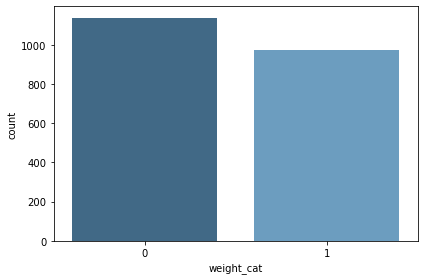

In [32]:
sns.countplot(x="weight_cat",                  
                 palette="Blues_d", 
                 order=df_prep["weight_cat"].value_counts().index,                 
                 data=df_prep)


# show figure & plots
plt.tight_layout()
plt.show()

In [33]:
# split dataset in features and target variable

# Features
X = df_prep.drop(columns=["NObeyesdad","weight_cat"])

# Target variable
y = df_prep['weight_cat'] 

In [34]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Scaled version of X train and X test
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

> ## Random Forest with Two Category Target Variable

In [35]:
# Number of trees in random forest
n_estimators = [int(x) for x in range(10, 200,10)]
# Criterion
criterion = ['gini','entropy']
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in range(10, 100, 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in range(2, 20,2)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in range(2, 20, 2)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# random state
random_state = [1010]

target_names = ['Not Obese', 'Obese']

parameters = { 'criterion':criterion,
               'n_estimators': n_estimators,
              'max_depth':max_depth,
              'random_state': random_state,
              'max_features':max_features
              #'min_samples_split':min_samples_split             
               }

hyper_tune('Random Forest', RandomForestClassifier(), parameters, target_names=target_names)

Fitting 5 folds for each of 1140 candidates, totalling 5700 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  20 tasks      | elapsed:    1.0s
[Parallel(n_jobs=15)]: Done 200 tasks      | elapsed:   22.1s
[Parallel(n_jobs=15)]: Done 450 tasks      | elapsed:   50.8s
[Parallel(n_jobs=15)]: Done 800 tasks      | elapsed:  1.5min
[Parallel(n_jobs=15)]: Done 1250 tasks      | elapsed:  2.4min
[Parallel(n_jobs=15)]: Done 1800 tasks      | elapsed:  3.5min
[Parallel(n_jobs=15)]: Done 2450 tasks      | elapsed:  4.8min
[Parallel(n_jobs=15)]: Done 3200 tasks      | elapsed:  6.3min
[Parallel(n_jobs=15)]: Done 4050 tasks      | elapsed:  8.1min
[Parallel(n_jobs=15)]: Done 5000 tasks      | elapsed: 10.1min
[Parallel(n_jobs=15)]: Done 5700 out of 5700 | elapsed: 11.6min finished


Accuracy Score = 0.92
{'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 110, 'random_state': 1010}

Classification Report:
               precision    recall  f1-score   support

   Not Obese       0.90      0.96      0.93       343
       Obese       0.94      0.88      0.91       291

    accuracy                           0.92       634
   macro avg       0.92      0.92      0.92       634
weighted avg       0.92      0.92      0.92       634



## Feature Importance with Random Forest: Two Category Variable Target

In [31]:
# Create Random Forest classifer object with optimized parameters
clf = RandomForestClassifier(criterion='gini',
               n_estimators=110,
              max_depth = 20,              
              max_features='auto',              
              random_state=1010)

# Train Random Forest classifer
clf = clf.fit(X_train_scaled,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_scaled)

C:\Users\tusha\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


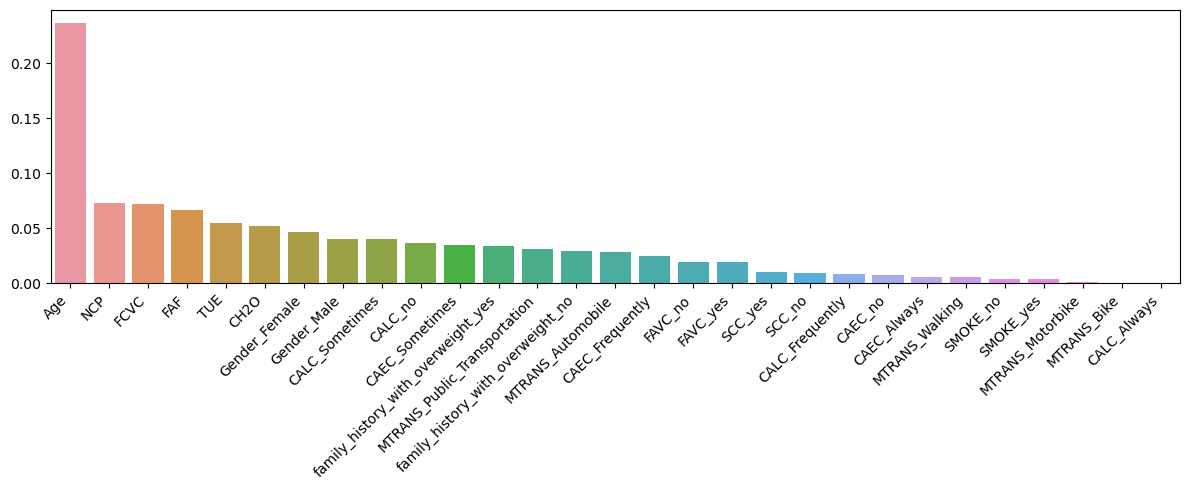


Top 10 Features:
Variable: Age                  Importance: 0.24
Variable: FCVC                 Importance: 0.07
Variable: NCP                  Importance: 0.07
Variable: FAF                  Importance: 0.07
Variable: CH2O                 Importance: 0.05
Variable: TUE                  Importance: 0.05
Variable: Gender_Female        Importance: 0.05
Variable: Gender_Male          Importance: 0.04
Variable: CALC_Sometimes       Importance: 0.04
Variable: CALC_no              Importance: 0.04

Bottom 10 Features:
Variable: SMOKE_no             Importance: 0.0
Variable: SMOKE_yes            Importance: 0.0
Variable: CALC_Always          Importance: 0.0
Variable: MTRANS_Bike          Importance: 0.0
Variable: MTRANS_Motorbike     Importance: 0.0
Variable: CAEC_Always          Importance: 0.01
Variable: CAEC_no              Importance: 0.01
Variable: SCC_no               Importance: 0.01
Variable: SCC_yes              Importance: 0.01
Variable: CALC_Frequently      Importance: 0.01


In [32]:
feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 5))

# Creating a bar plot
sns.barplot(x=feature_imp.index, y=feature_imp)

# Add labels to your graph
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

# create features list
features_list = X.columns
features_list = features_list.tolist()

# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
print("\nTop 10 Features:")
display_top = [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[:10]]

# Sort the feature importances by least important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = False)
# Print out the feature and importances 
print("\nBottom 10 Features:")
display_bottom = [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[:10]]